In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
from Mine import *
from main import *

In [2]:
with open('param.json', 'r') as f:
    param = json.load(f)

# Run the experiment
results = std(param, for_internal_use=True)
with open('stats.json', 'w') as f:
    json.dump(results, f)

Truck0      is traveling towards Shovel2	at 0.00.
Truck1      is traveling towards Shovel2	at 0.00.
Truck2      is traveling towards Shovel2	at 0.00.
Truck3      is traveling towards Shovel2	at 0.00.
Truck4      is traveling towards Shovel2	at 0.00.
Truck5      is traveling towards Shovel2	at 0.00.
Truck6      is traveling towards Shovel2	at 0.00.
Truck7      is traveling towards Shovel2	at 0.00.
Truck8      is traveling towards Shovel2	at 0.00.
Truck9      is traveling towards Shovel2	at 0.00.
Truck5      arrived at Shovel2			at 16.96.
Truck5      start loading at Shovel2		at 16.96.
Truck4      arrived at Shovel2			at 18.03.
Truck2      arrived at Shovel2			at 18.56.
Truck3      arrived at Shovel2			at 18.91.
Truck8      arrived at Shovel2			at 18.97.
Truck7      arrived at Shovel2			at 19.56.
Truck9      arrived at Shovel2			at 19.98.
Truck6      arrived at Shovel2			at 20.15.
Truck1      arrived at Shovel2			at 20.73.
Truck0      arrived at Shovel2			at 21.87.
Truck5      loaded by 

Truck3      is traveling towards Shovel0	at 1286.75.
Truck9      arrived at Shovel2			at 1291.03.
Truck2      loaded by Shovel2			at 1292.53.
Truck2      is traveling towards DumpSite1	at 1292.53.
Truck9      start loading at Shovel2		at 1292.53.
Truck0      loaded by Shovel1			at 1293.38.
Truck0      is traveling towards DumpSite0	at 1293.38.
Truck8      arrived at Shovel0			at 1293.47.
Truck8      start loading at Shovel0		at 1293.47.
Truck9      loaded by Shovel2			at 1301.24.
Truck9      is traveling towards DumpSite0	at 1301.24.
Truck8      loaded by Shovel0			at 1303.18.
Truck8      is traveling towards DumpSite0	at 1303.18.
Truck6      arrived at DumpSite1		at 1305.99.
Truck6      under unloading at DumpSite1	at 1305.99.
Truck7      arrived at DumpSite0		at 1307.81.
Truck7      under unloading at DumpSite0	at 1307.81.
Truck6      unloaded at DumpSite1		at 1309.39.
Truck6      is traveling towards Shovel2	at 1309.39.
Truck7      unloaded at DumpSite0		at 1311.31.
Truck7      is t

Truck4      under unloading at DumpSite0	at 4065.35.
Truck4      unloaded at DumpSite0		at 4068.86.
Truck4      is traveling towards Shovel1	at 4068.86.
Truck9      arrived at Shovel1			at 4072.60.
Truck9      start loading at Shovel1		at 4072.60.
Truck9      loaded by Shovel1			at 4081.66.
Truck9      is traveling towards DumpSite0	at 4081.66.
Truck4      arrived at Shovel1			at 4097.93.
Truck4      start loading at Shovel1		at 4097.93.
Truck4      loaded by Shovel1			at 4108.62.
Truck4      is traveling towards DumpSite0	at 4108.62.
Truck9      arrived at DumpSite0		at 4112.86.
Truck9      under unloading at DumpSite0	at 4112.86.
Truck9      unloaded at DumpSite0		at 4116.05.
Truck9      is traveling towards Shovel0	at 4116.05.
Truck4      arrived at DumpSite0		at 4139.78.
Truck4      under unloading at DumpSite0	at 4139.78.
Truck9      arrived at Shovel0			at 4142.22.
Truck9      start loading at Shovel0		at 4142.22.
Truck4      unloaded at DumpSite0		at 4143.00.
Truck4      is trav

Shovel2     arrived at its site			at 25008.11.
Truck5      repaired by Workshop0		at 25434.08.
Truck5      is traveling towards Shovel2	at 25434.08.
Truck7      under repair at Workshop0		at 25434.08.
Truck5      arrived at Shovel2			at 25437.75.
Truck5      start loading at Shovel2		at 25437.75.
Truck5      loaded by Shovel2			at 25445.58.
Truck5      is traveling towards DumpSite0	at 25445.58.
Truck5      arrived at DumpSite0		at 25479.32.
Truck5      under unloading at DumpSite0	at 25479.32.
Truck5      unloaded at DumpSite0		at 25482.68.
Truck5      is traveling towards Shovel0	at 25482.68.
Truck5      arrived at Shovel0			at 25510.83.
Truck5      start loading at Shovel0		at 25510.83.
Truck5      loaded by Shovel0			at 25520.05.
Truck5      is traveling towards DumpSite0	at 25520.05.
Truck5      arrived at DumpSite0		at 25546.63.
Truck5      under unloading at DumpSite0	at 25546.63.
Truck5      unloaded at DumpSite0		at 25549.49.
Truck5      is traveling towards Shovel0	at 25549.4

Truck1      is traveling to Workshop0		at 44313.49.
Truck1      arrived at WorkShop0		at 44317.58.
Shovel2     repaired at Workshop0		at 46096.10.
Shovel2     is traveling towards its site	at 46096.10.
Shovel1     is under repair at Workshop0	at 46096.10.
Shovel2     arrived at its site			at 46100.03.
Shovel1     repaired at Workshop0		at 48436.39.
Shovel1     is traveling towards its site	at 48436.39.
Truck0      under repair at Workshop0		at 48436.39.
Shovel1     arrived at its site			at 48471.14.
Shovel0     failed				at 48831.22.
Shovel0     is traveling towards Workshop0	at 48831.22.
Shovel0     arrived at Workshop0		at 48840.47.
Shovel2     failed				at 50567.75.
Shovel2     is traveling towards Workshop0	at 50567.75.
Shovel2     arrived at Workshop0		at 50571.41.
Shovel1     failed				at 60163.43.
Shovel1     is traveling towards Workshop0	at 60163.43.
Shovel1     arrived at Workshop0		at 60193.99.
Truck0      repaired by Workshop0		at 65889.79.
Truck0      is traveling towards 

Truck9      loaded by Shovel0			at 70045.69.
Truck9      is traveling towards DumpSite0	at 70045.69.
Truck7      arrived at DumpSite0		at 70047.39.
Truck7      under unloading at DumpSite0	at 70047.39.
Truck7      unloaded at DumpSite0		at 70050.93.
Truck7      is traveling towards Shovel0	at 70050.93.
Truck0      arrived at DumpSite1		at 70058.08.
Truck0      under unloading at DumpSite1	at 70058.08.
Truck0      unloaded at DumpSite1		at 70061.67.
Truck0      is traveling towards Shovel2	at 70061.67.
Truck9      arrived at DumpSite0		at 70071.87.
Truck9      under unloading at DumpSite0	at 70071.87.
Truck9      unloaded at DumpSite0		at 70075.20.
Truck9      is traveling towards Shovel0	at 70075.20.
Truck7      arrived at Shovel0			at 70077.05.
Truck7      start loading at Shovel0		at 70077.05.
Truck7      loaded by Shovel0			at 70091.13.
Truck7      is traveling towards DumpSite0	at 70091.13.
Truck0      arrived at Shovel2			at 70094.95.
Truck0      start loading at Shovel2		at 70094

Truck8      unloaded at DumpSite1		at 81471.62.
Truck8      is traveling towards Shovel2	at 81471.62.
Truck5      arrived at DumpSite0		at 81472.68.
Truck5      under unloading at DumpSite0	at 81472.68.
Truck5      unloaded at DumpSite0		at 81475.63.
Truck5      is traveling towards Shovel0	at 81475.63.
Truck4      arrived at Shovel2			at 81477.13.
Truck4      start loading at Shovel2		at 81477.13.
Truck2      arrived at DumpSite0		at 81477.16.
Truck2      under unloading at DumpSite0	at 81477.16.
Truck2      unloaded at DumpSite0		at 81480.68.
Truck2      is traveling towards Shovel0	at 81480.68.
Truck6      arrived at Shovel1			at 81483.05.
Truck6      start loading at Shovel1		at 81483.05.
Truck7      repaired by Workshop0		at 81487.38.
Truck7      is traveling towards Shovel2	at 81487.38.
Truck0      under repair at Workshop0		at 81487.38.
Truck4      loaded by Shovel2			at 81487.90.
Truck4      is traveling towards DumpSite1	at 81487.90.
Truck7      arrived at Shovel2			at 81491.2

Truck1      is traveling towards DumpSite0	at 84217.65.
Truck9      arrived at DumpSite0		at 84220.30.
Truck9      under unloading at DumpSite0	at 84220.30.
Truck9      unloaded at DumpSite0		at 84223.21.
Truck9      is traveling towards Shovel0	at 84223.21.
Truck8      arrived at Shovel2			at 84224.65.
Truck8      start loading at Shovel2		at 84224.65.
Truck2      arrived at Shovel0			at 84230.70.
Truck2      start loading at Shovel0		at 84230.70.
Truck8      loaded by Shovel2			at 84232.13.
Truck8      is traveling towards DumpSite1	at 84232.13.
Truck2      loaded by Shovel0			at 84242.50.
Truck2      is traveling towards DumpSite0	at 84242.50.
Truck1      arrived at DumpSite0		at 84243.98.
Truck1      under unloading at DumpSite0	at 84243.98.
Truck1      unloaded at DumpSite0		at 84247.32.
Truck1      is traveling to Workshop1		at 84247.32.
Truck0      arrived at DumpSite0		at 84248.05.
Truck0      under unloading at DumpSite0	at 84248.05.
Truck9      arrived at Shovel0			at 84249.7

Truck4      under unloading at DumpSite1	at 93451.38.
Truck4      unloaded at DumpSite1		at 93454.47.
Truck4      is traveling towards Shovel2	at 93454.47.
Truck6      arrived at DumpSite0		at 93456.67.
Truck6      under unloading at DumpSite0	at 93456.67.
Truck6      unloaded at DumpSite0		at 93459.52.
Truck6      is traveling towards Shovel0	at 93459.52.
Truck6      arrived at Shovel0			at 93484.30.
Truck6      start loading at Shovel0		at 93484.30.
Truck9      arrived at Shovel0			at 93484.99.
Truck4      arrived at Shovel2			at 93485.42.
Truck4      start loading at Shovel2		at 93485.42.
Truck4      loaded by Shovel2			at 93494.63.
Truck4      is traveling towards DumpSite1	at 93494.63.
Truck6      loaded by Shovel0			at 93496.02.
Truck6      is traveling towards DumpSite0	at 93496.02.
Truck9      start loading at Shovel0		at 93496.02.
Truck9      loaded by Shovel0			at 93507.83.
Truck9      is traveling towards DumpSite0	at 93507.83.
Truck4      arrived at DumpSite1		at 93522.37.


In [3]:
with open('stats.json', 'r') as f:
    stats = json.load(f)

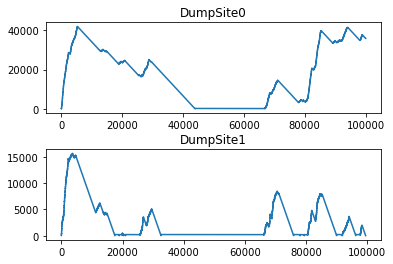

In [4]:
for i in range(2):
    data = np.array(stats["DumpSite%d_stockpileLevel" % i])
    plt.subplot(2,1,i+1)
    plt.step(data[:,0], data[:,1])
    plt.title("DumpSite%d" % i)
plt.subplots_adjust(hspace=.4)
plt.show()

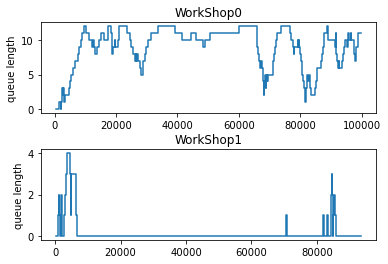

In [5]:
for i in range(2):
    data = np.array(stats["WorkShop%d"%i])
    plt.subplot(2,1,i+1)
    plt.step(data[:,0], data[:,1])
    plt.title("WorkShop%d"%i)
    plt.ylabel("queue length")
plt.subplots_adjust(hspace=.4)
plt.show()